In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/airline_passengers.csv",index_col='Month',parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualization

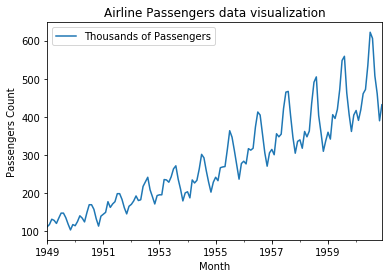

In [4]:
df.plot()
plt.title("Airline Passengers data visualization")
plt.ylabel("Passengers Count")
plt.show()

### Decomposition Methods

#### 1. Additive

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

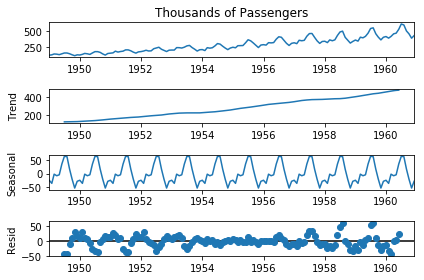

In [6]:
additive = seasonal_decompose(df['Thousands of Passengers'], model='additive')  # model='mul' also works
additive.plot();

#### 2. Multiplicative

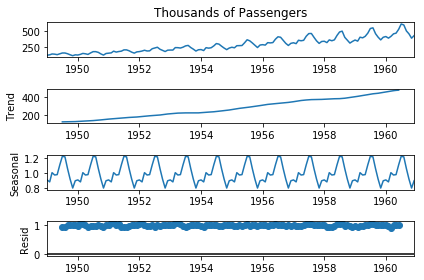

In [7]:
multiplicative = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
multiplicative.plot();

## Modelling Techniques

### 1. Simple Moving Average

In [8]:
df['4_period_SMA'] = df['Thousands of Passengers'].rolling(window=4).mean()
df['4_period_SMA']

Month
1949-01-01       NaN
1949-02-01       NaN
1949-03-01       NaN
1949-04-01    122.75
1949-05-01    125.00
               ...  
1960-08-01    558.75
1960-09-01    567.75
1960-10-01    549.25
1960-11-01    491.25
1960-12-01    447.75
Name: 4_period_SMA, Length: 144, dtype: float64

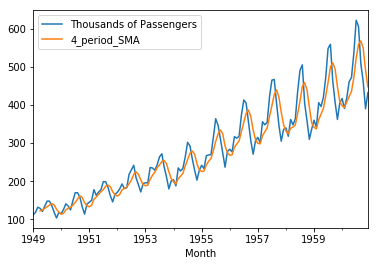

In [9]:
df.plot();

In [10]:
df['8_period_SMA'] = df['Thousands of Passengers'].rolling(window=8).mean()
df['8_period_SMA']

Month
1949-01-01        NaN
1949-02-01        NaN
1949-03-01        NaN
1949-04-01        NaN
1949-05-01        NaN
               ...   
1960-08-01    490.375
1960-09-01    501.750
1960-10-01    510.500
1960-11-01    506.875
1960-12-01    503.250
Name: 8_period_SMA, Length: 144, dtype: float64

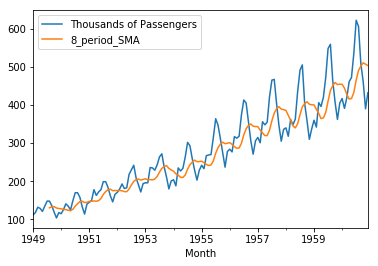

In [11]:
df[["Thousands of Passengers","8_period_SMA"]].plot()

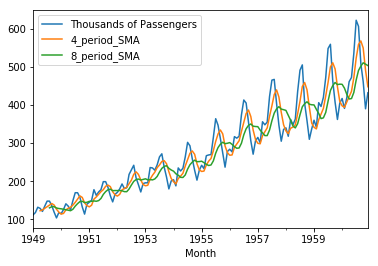

In [12]:
df.plot()

### 2. Exponential Smoothing 

#### Perfroming using Panda's built-in method

In [13]:
df['EWMA_0.2'] = df['Thousands of Passengers'].ewm(alpha = 0.2,adjust=False).mean()

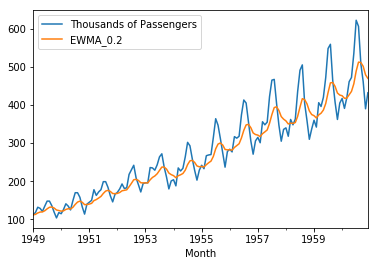

In [14]:
df[['Thousands of Passengers','EWMA_0.2']].plot()

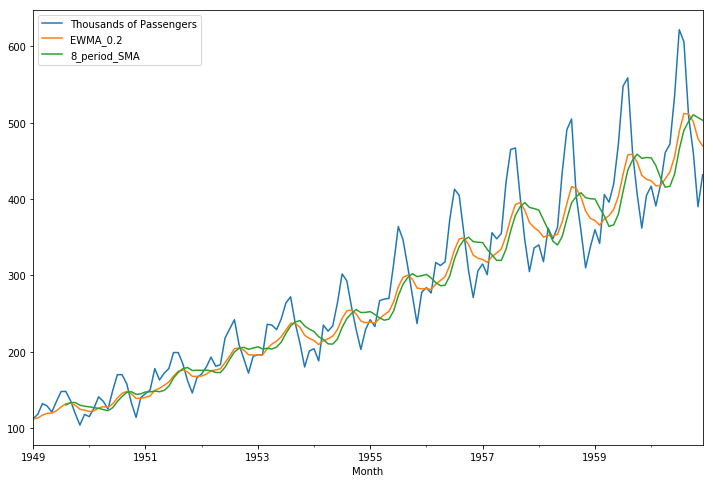

In [15]:
df[['Thousands of Passengers','EWMA_0.2','8_period_SMA']].plot(figsize=(12,8))
plt.show()

#### Splitting into train and test set

In [16]:
train_len = int(np.round(df.shape[0]*0.8))

In [17]:
train_data = df.iloc[:train_len] 
test_data = df.iloc[train_len:]

In [18]:
print("Size of training data : ", train_data.shape)
print("Size of test data : ", test_data.shape)

Size of training data :  (115, 4)
Size of test data :  (29, 4)


In [19]:
train_data.head()

,Thousands of Passengers,4_period_SMA,8_period_SMA,EWMA_0.2
Month,,,,
1949-01-01,112,NaN,NaN,112.0000
1949-02-01,118,NaN,NaN,113.2000
1949-03-01,132,NaN,NaN,116.9600
1949-04-01,129,122.75,NaN,119.3680
1949-05-01,121,125.00,NaN,119.6944


#### Modelling using statsmodels library

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [21]:
# 1. Using SimpleExpSmoothing
fitted_model = SimpleExpSmoothing(train_data['Thousands of Passengers']).fit()
test_predictions = fitted_model.forecast(29)
print("RMSE : ", np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], test_predictions)))

RMSE :  93.13394136662937


In [22]:
# 2. Using ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul').fit()
test_predictions = fitted_model.forecast(29)
print("RMSE : ", np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], test_predictions)))

RMSE :  13.407221055590048


### Stationarity Check

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
print("p-value : ", adfuller(df["Thousands of Passengers"],autolag='AIC')[1])

p-value :  0.991880243437641


### 3. ARIMA

#### Using auto_arima

In [25]:
from pmdarima import auto_arima

In [26]:
auto_arima(df["Thousands of Passengers"], seasonal=False, trace = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=1344.044, BIC=1361.821, Time=1.996 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1415.278, BIC=1421.203, Time=0.041 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1403.473, BIC=1412.361, Time=0.247 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1398.827, BIC=1407.716, Time=0.386 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1413.909, BIC=1416.872, Time=0.036 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=1371.827, BIC=1386.641, Time=0.716 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=1361.693, BIC=1376.507, Time=1.239 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Thu, 04 Feb 2021   AIC                           1344.044
Time:                        07:23:09   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6620      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.885      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.751      0.000      -0.958      -0.861
ma.L1         -1.9079      0.356     -5.352      0.000      -2.607      -1.209
ma.L2          0.9977      0.372      2.680      0.007       0.268       1.727
sigma2       611.8446    247.760      2.470      0.014     126.244    1097.445
===================================================================================
Ljung-Box (Q):                      358.21   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fitting as per the obtained parameters

In [27]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [28]:
ARIMA_model = ARIMA(train_data['Thousands of Passengers'],order=(2,1,2))
results = ARIMA_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Thousands of Passengers   No. Observations:                  114
Model:                        ARIMA(2, 1, 2)   Log Likelihood                -517.597
Method:                              css-mle   S.D. of innovations             22.297
Date:                       Thu, 04 Feb 2021   AIC                           1047.193
Time:                               07:23:10   BIC                           1063.610
Sample:                           02-01-1949   HQIC                          1053.856
                                - 07-01-1958                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.5986      0.225     11.534      0.000       2.157       3.040
ar.L1.D.Thousands of Passengers     0.3331      0.171      1.945      0.052      -0.003       0.669
ar.L2.D.Thousands of Passengers     0.1760      0.168      1.046      0.296      -0.154       0.506
ma.L1.D.Thousands of Passengers    -0.1648      0.136     -1.216      0.224      -0.431       0.101
ma.L2.D.Thousands of Passengers    -0.8351      0.135     -6.205      0.000      -1.099      -0.571
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6184           +0.0000j            1.6184            0.0000
AR.2           -3.5109           +0.0000j            3.5109            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1974           +0.0000j            1.1974            0.5000
-----------------------------------------------------------------------------
"""

#### Forecasting and evaluation

In [29]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end)
print("RMSE : ", np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], predictions)))

RMSE :  447.83533104284726


#### auto_arima with different setting

In [30]:
auto_arima(df["Thousands of Passengers"], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1024.824, BIC=1039.200, Time=2.369 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.081 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=1.684 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=1.974 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.073 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.531 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=5.241 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.168, BIC=1034.419, Time=21.966 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=10

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.923
Date:                            Thu, 04 Feb 2021   AIC                           1015.846
Time:                                    07:24:48   BIC                           1033.097
Sample:                                         0   HQIC                          1022.856
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.033      0.015      0.988      -0.065       0.066
ma.L1         -0.4267      0.068     -6.234      0.000      -0.561      -0.293
ar.S.L12       0.6672      0.161      4.141      0.000       0.351       0.983
ar.S.L24       0.3306      0.096      3.455      0.001       0.143       0.518
ma.S.L12      -0.9691      1.031     -0.940      0.347      -2.990       1.052
sigma2       111.5447     91.916      1.214      0.225     -68.608     291.697
===================================================================================
Ljung-Box (Q):                       52.96   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.08   Prob(JB):                         0.03
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fitting using obtained parameters

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
ARIMA_model = SARIMAX(train_data['Thousands of Passengers'],order=(0,1,1), seasonal_order=(2,1,1,12), m=12)
results = ARIMA_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                  115
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -371.890
Date:                            Thu, 04 Feb 2021   AIC                            753.780
Time:                                    07:25:03   BIC                            766.905
Sample:                                01-01-1949   HQIC                           759.095
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2393      0.089     -2.677      0.007      -0.415      -0.064
ar.S.L12       0.7252      0.320      2.265      0.024       0.098       1.353
ar.S.L24       0.2740      0.099      2.766      0.006       0.080       0.468
ma.S.L12      -0.9819      3.596     -0.273      0.785      -8.030       6.066
sigma2        75.7327    248.716      0.304      0.761    -411.743     563.208
===================================================================================
Ljung-Box (Q):                       40.82   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.43   Prob(JB):                         0.20
Heteroskedasticity (H):               1.04   Skew:                             0.40
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting and evaluation

In [33]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end)
print("RMSE : ", np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], predictions)))

RMSE :  32.70471661256273


#### Future Forecasting

In [34]:
ARIMA_model = SARIMAX(df['Thousands of Passengers'],order=(2,1,2), seasonal_order=(0,1,1,12), m=12)
results = ARIMA_model.fit()
forecasted_5  = results.predict(len(df),len(df)+5)
print(forecasted_5)

1961-01-01    444.988563
1961-02-01    421.241575
1961-03-01    453.352609
1961-04-01    490.701226
1961-05-01    503.448415
1961-06-01    565.987726
Freq: MS, dtype: float64
